#### Student Name : Sellah Otieno
#### Student Pace: Part time

### Business Objective
The aim of this project is to predict whether a customer will churn or not. We analyze customer minutes, calls, charge and other variables to be able to come up with a tangible answer. 

In [1]:
# we import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading the data and previewing 10 random sample rows
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.sample(10)

state  account length  area code phone number international plan  \
2195    MS              68        415     375-3668                 no   
2612    KY              73        510     377-8309                 no   
2406    MN              81        510     375-2522                 no   
651     CT             105        408     357-2679                 no   
116     NJ              64        510     391-4652                 no   
1303    VA              10        415     352-5697                 no   
2789    WA              47        415     329-9517                 no   
3103    DE             115        415     415-8164                 no   
2223    ID             134        415     345-4473                 no   
3023    MT             103        510     342-1004                 no   

     voice mail plan  number vmail messages  total day minutes  \
2195             yes                     34              160.0   
2612              no                      0              234.7   
2406              no                      0              145.6   
651               no                      0              213.4   
116               no                      0              162.6   
1303              no                      0              222.2   
2789             yes                     27              165.0   
3103              no                      0              195.9   
2223              no                      0              204.7   
3023             yes                     35              110.5   

      total day calls  total day charge  ...  total eve calls  \
2195               72             27.20  ...              119   
2612              102             39.90  ...              110   
2406               59             24.75  ...              131   
651               100             36.28  ...               52   
116                83             27.64  ...              109   
1303              127             37.77  ...              125   
2789               89             28.05  ...              118   
3103              111             33.30  ...              108   
2223              108             34.80  ...              105   
3023              101             18.79  ...               81   

      total eve charge  total night minutes  total night calls  \
2195             15.68                208.3                101   
2612             16.63                253.4                 71   
2406             24.47                181.7                121   
651              17.42                179.7                 93   
116              12.95                 57.5                122   
1303             13.01                227.4                 80   
2789             10.82                284.4                 95   
3103             19.30                313.2                113   
2223             12.16                165.8                 84   
3023             17.71                 87.4                 77   

      total night charge  total intl minutes  total intl calls  \
2195                9.37                 6.1                10   
2612               11.40                 8.4                 8   
2406                8.18                 9.2                 4   
651                 8.09                 9.5                 6   
116                 2.59                14.2                 3   
1303               10.23                12.9                 4   
2789               12.80                 7.7                 4   
3103               14.09                13.2                 1   
2223                7.46                11.0                 4   
3023                3.93                13.9                 2   

      total intl charge  customer service calls  churn  
2195               1.65                       1  False  
2612               2.27                       2  False  
2406               2.48                       2  False  
651                2.57                       1  False  
116                

In [3]:
# we display the information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

From the above cells we note that the dataset has 21 columns & 3333 rows.We also note the different data types in the dataset. The data set has 3333 rows each column has 3333 non-nulls. From this cells then we can assume that the data set has no null values.

### Data Cleaning & Preprocessing
we check for any discrepancies in our data. This includes correcting for duplicated entries,missing data and invalid data.

In [5]:
# Checking for sum of missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The above cell shows that our data has no missing values.

In [6]:
#counting the number of duplicates
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

The data has no duplicated values.

In [7]:
#drop unnnecessary columns
df = df.drop(['phone number', 'account length', 'area code'], axis=1)
df.head()

state international plan voice mail plan  number vmail messages  \
0    KS                 no             yes                     25   
1    OH                 no             yes                     26   
2    NJ                 no              no                      0   
3    OH                yes              no                      0   
4    OK                yes              no                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1  False  
1               3.70                       1  False  
2               3.29                       0  False  
3               1.78                       2  False  
4               2.73                       3  False

In [8]:
#check the datatypes
df.dtypes

state                      object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

### Exploratory Data Analysis (EDA)
 In this section we get the visualize relationship between Independent variables and target variable

#### Univariate Analysis

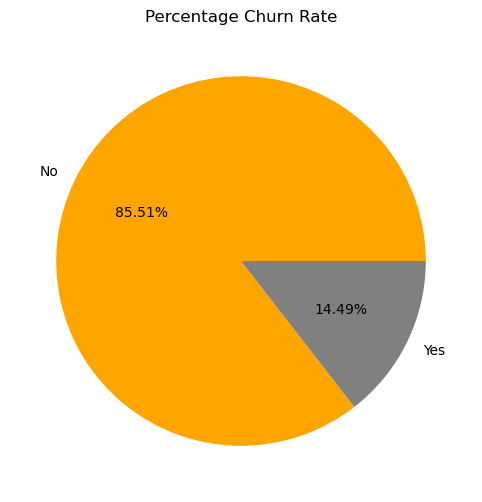

In [9]:
#pie chart for customer churn

plt.figure(figsize=(10,6))
plt.pie(df['churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%', colors=['orange', 'grey'])
plt.title('Percentage Churn Rate')
plt.show()

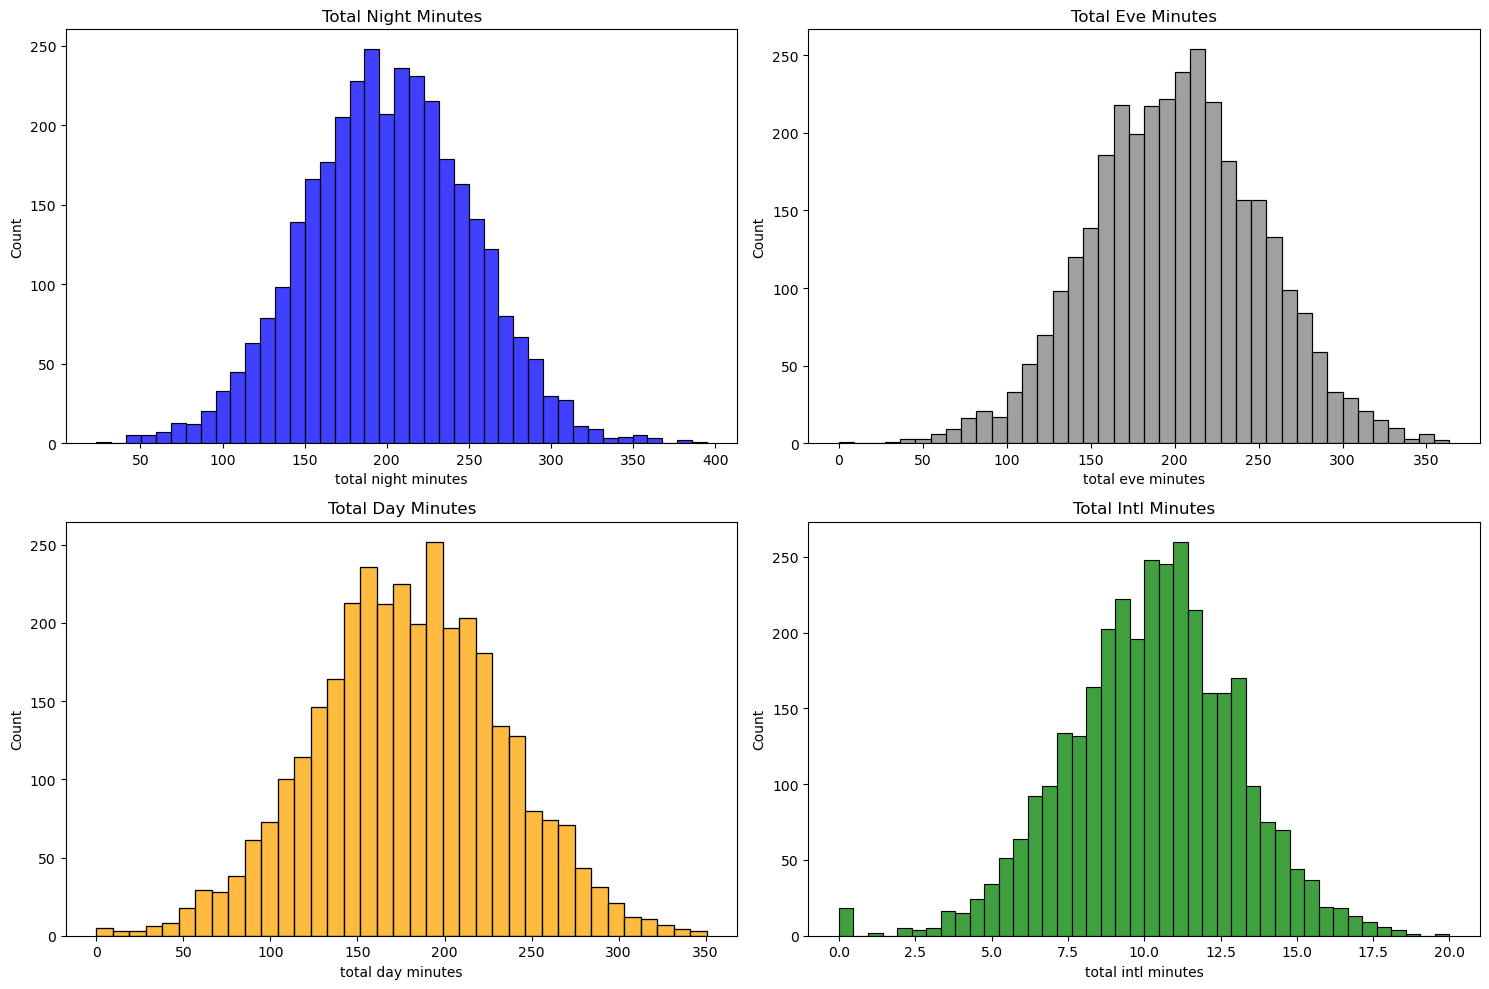

In [10]:
#Display histogram for all minutes
# Create subplots with a 2x2 grid of axes
fig, ax = plt.subplots(2,2, figsize=(15, 10))

#Display histogram for 'total night minutes'
sns.histplot(x='total night minutes', data=df, ax=ax[0,0], color='blue').set_title('Total Night Minutes')

#Display histogram for 'total eve minutes'
sns.histplot(x='total eve minutes', data=df, ax=ax[0,1], color='grey').set_title('Total Eve Minutes')

#Display histogram for 'total day minutes'
sns.histplot(x='total day minutes', data=df, ax=ax[1,0], color='orange').set_title('Total Day Minutes')

#Display histogram for 'total intl minutes'
sns.histplot(x='total intl minutes', data=df, ax=ax[1,1], color='green').set_title('Total Intl Minutes')

# Adjust layout
plt.tight_layout()

plt.show()

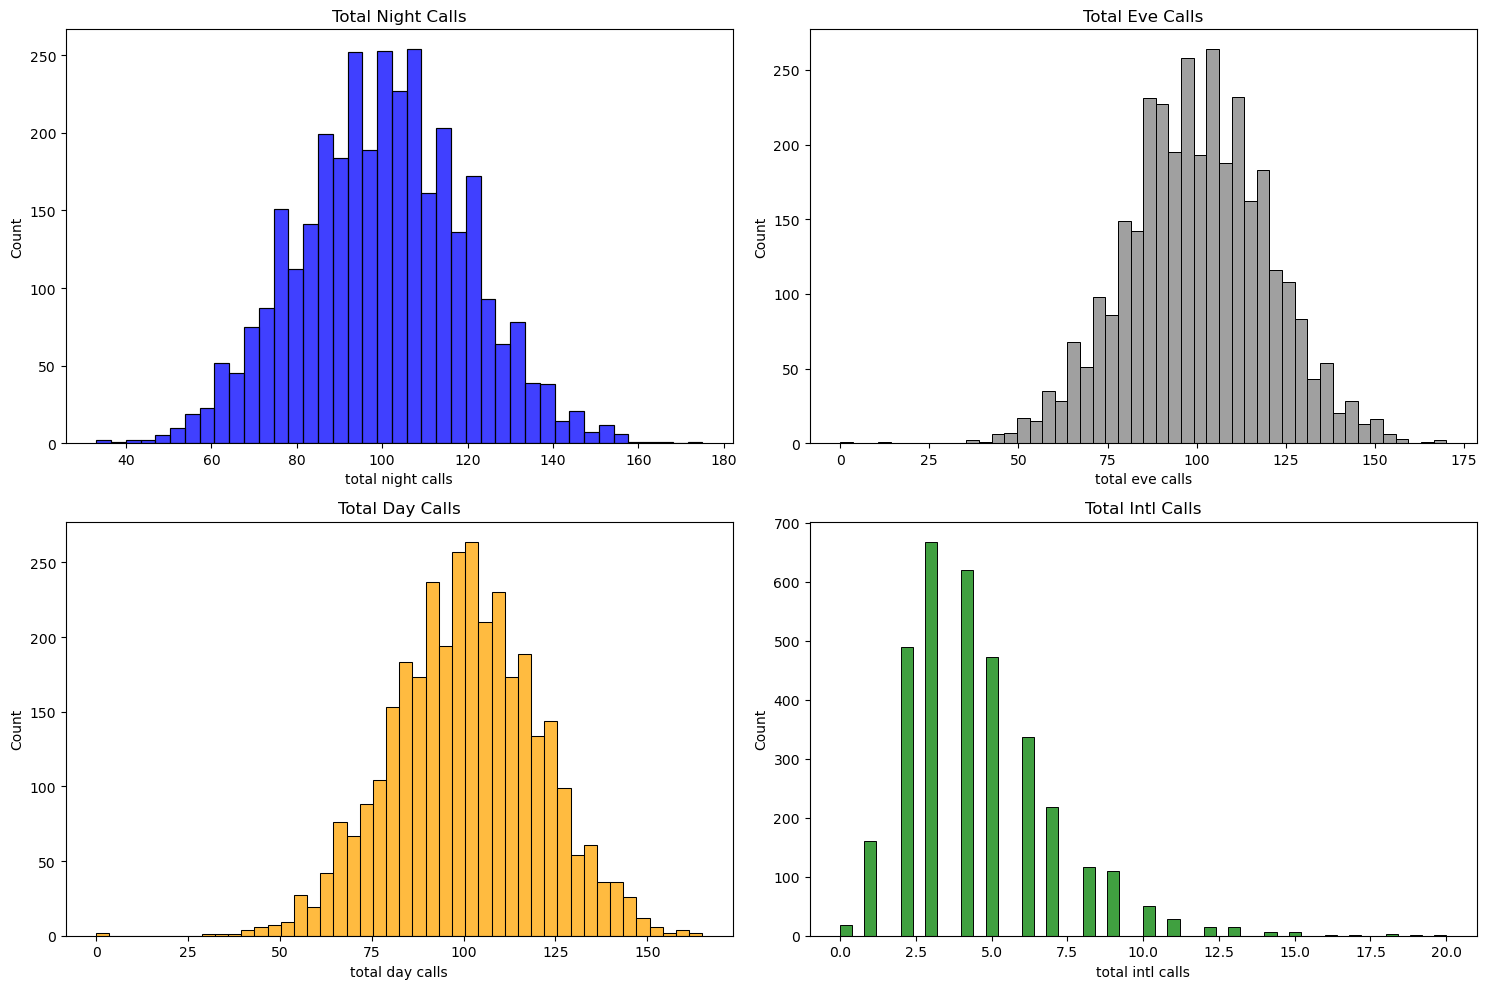

In [11]:
#Display histogram for all calls
# Create subplots with a 2x2 grid of axes
fig, ax = plt.subplots(2,2, figsize=(15, 10))

#Display histogram for 'total night calls'
sns.histplot(x='total night calls', data=df, ax=ax[0,0], color='blue').set_title('Total Night Calls')

#Display histogram for 'total eve calls'
sns.histplot(x='total eve calls', data=df, ax=ax[0,1], color='grey').set_title('Total Eve Calls')

#Display histogram for 'total day calls'
sns.histplot(x='total day calls', data=df, ax=ax[1,0], color='orange').set_title('Total Day Calls')

#Display histogram for 'total intl calls'
sns.histplot(x='total intl calls', data=df, ax=ax[1,1], color='green').set_title('Total Intl Calls')

# Adjust layout
plt.tight_layout()

plt.show()

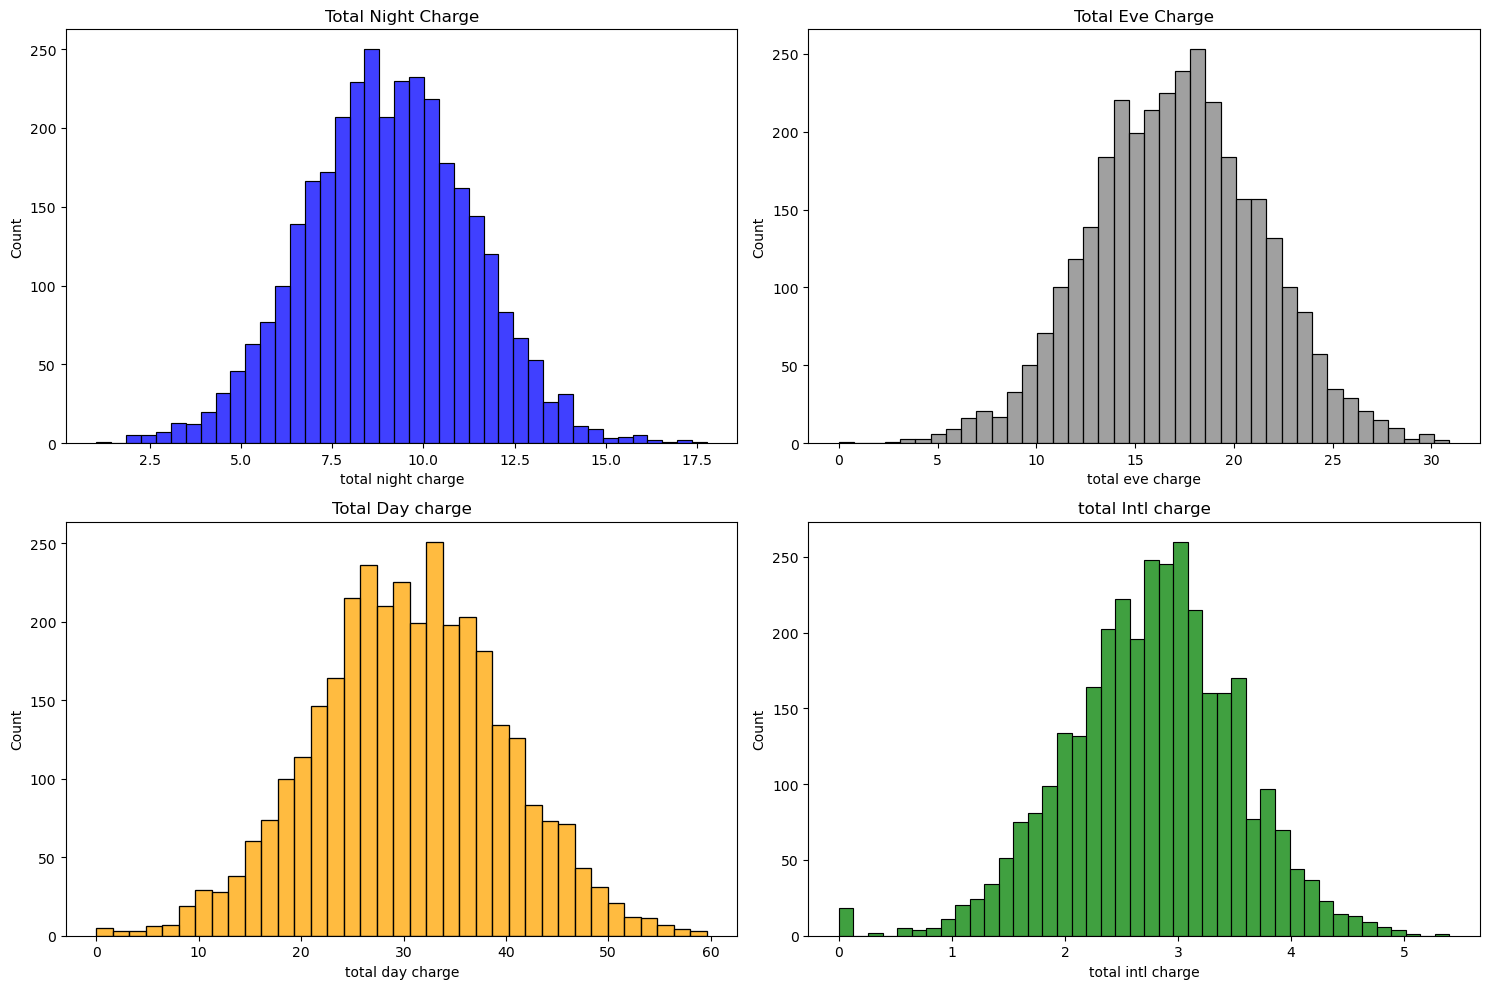

In [12]:
#Display histogram for all charges
# Create subplots with a 2x2 grid of axes
fig, ax = plt.subplots(2,2, figsize=(15, 10))

#Display histogram for 'total night charge'
sns.histplot(x='total night charge', data=df, ax=ax[0,0], color='blue').set_title('Total Night Charge')

#Display histogram for 'total eve charge'
sns.histplot(x='total eve charge', data=df, ax=ax[0,1], color='grey').set_title('Total Eve Charge')

#Display histogram for 'total day charge'
sns.histplot(x='total day charge', data=df, ax=ax[1,0], color='orange').set_title('Total Day charge')

#Display histogram for 'total intl charge'
sns.histplot(x='total intl charge', data=df, ax=ax[1,1], color='green').set_title('total Intl charge')

# Adjust layout
plt.tight_layout()

plt.show()

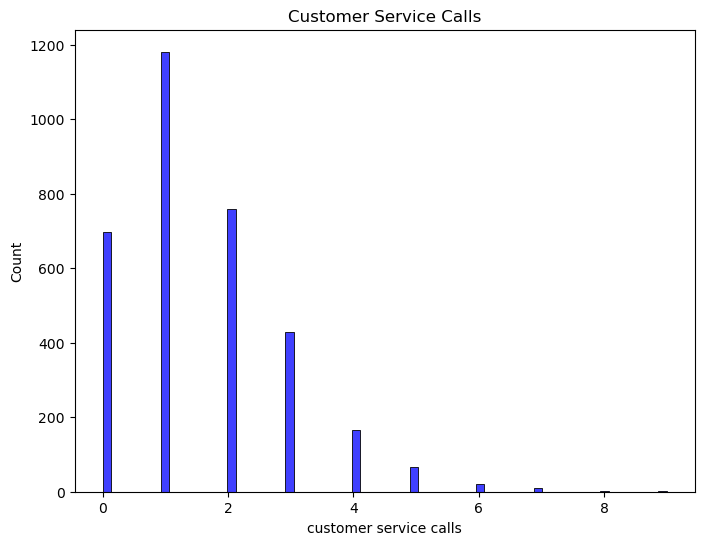

In [13]:
#Display histogram for customer service calls
# Create a subplot with a 1x1 grid of axes
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

#Display histogram for 'customer service calls'
sns.histplot(x='customer service calls', data=df, ax=ax, color='blue').set_title('Customer Service Calls')

plt.show()

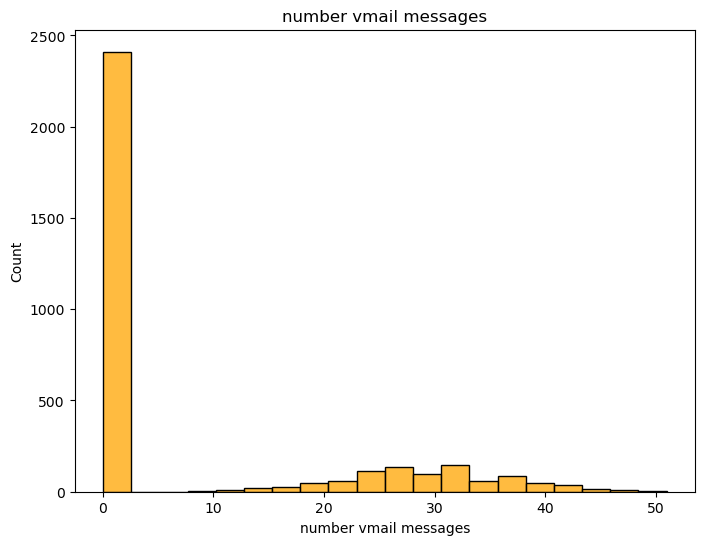

In [14]:
#Display histogram for number vmail messages 
# Create a subplot with a 1x1 grid of axes
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

#Display histogram for 'number vmail messages'
sns.histplot(x='number vmail messages', data=df, ax=ax, color='orange').set_title('number vmail messages')

plt.show()

#### Bivariate Analysis

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\Sellah\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


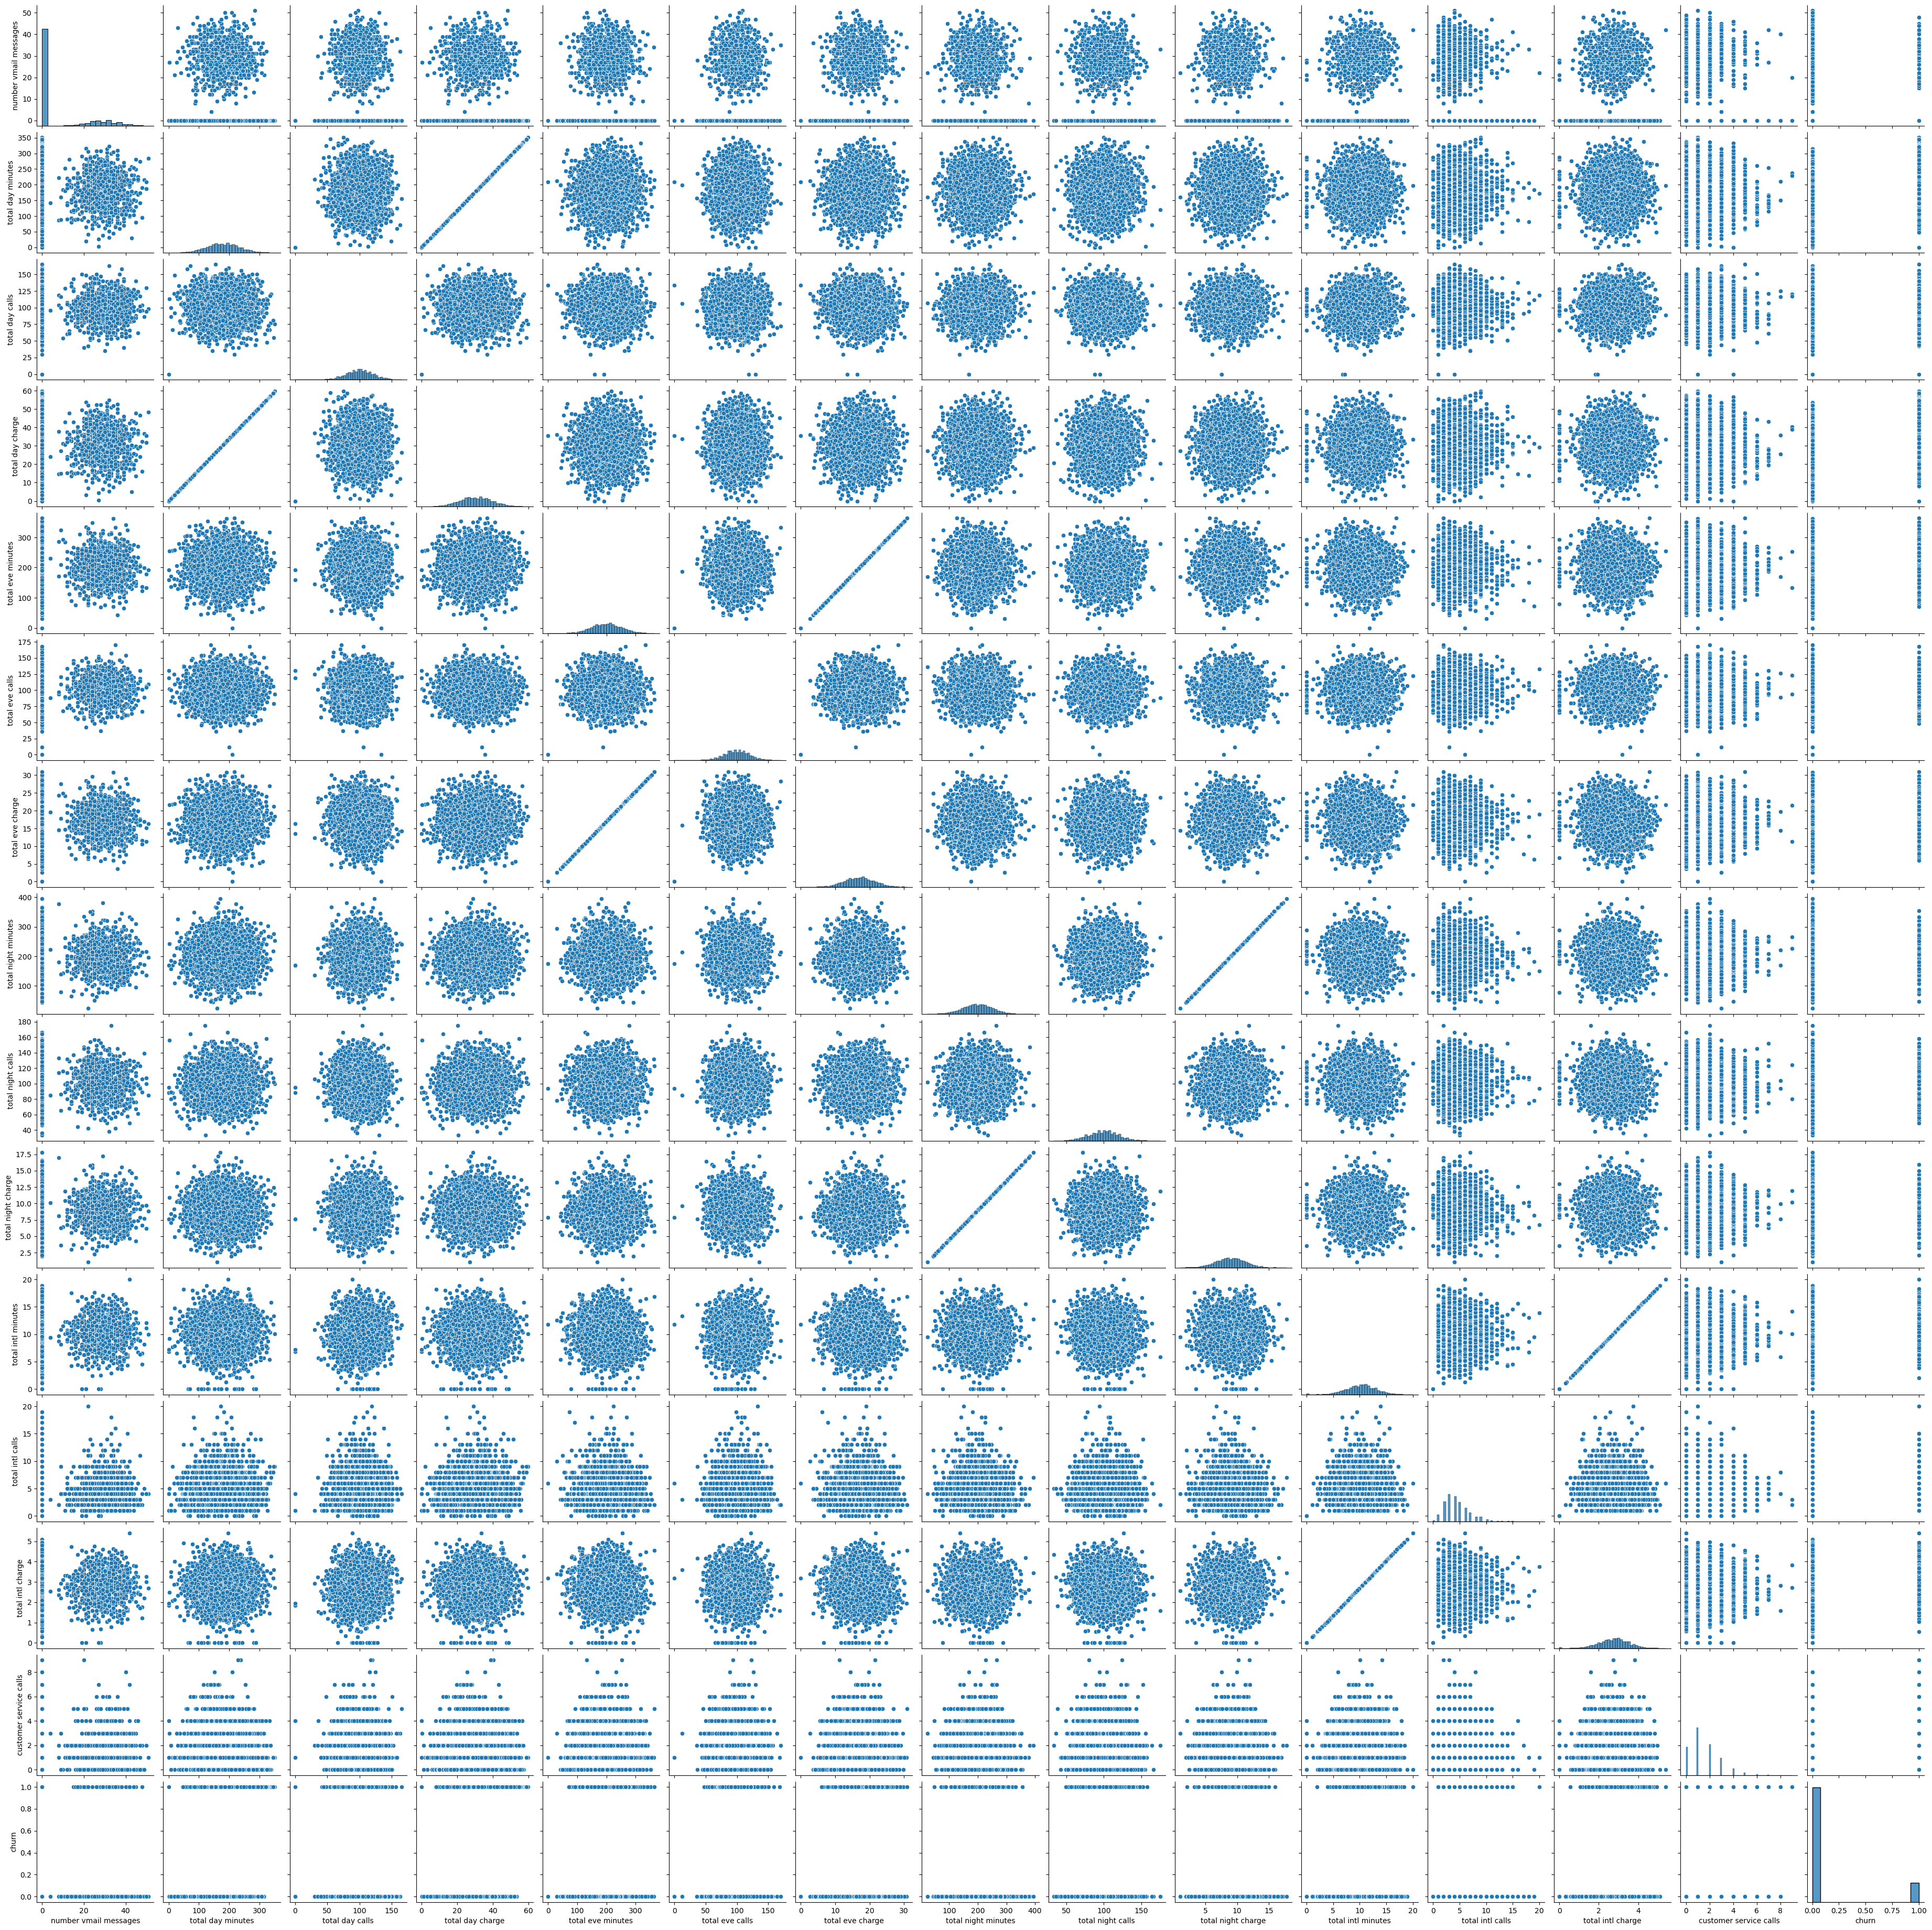

In [15]:
sns.pairplot(data = df)

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\3135852207.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='total intl minutes', data=df, ci=None, palette=['orange', 'grey'])


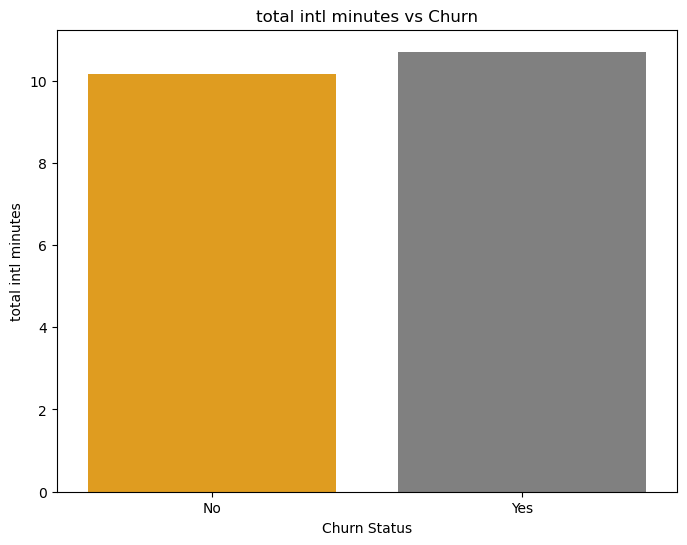

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\3135852207.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='total day minutes', data=df, ci=None, palette=['orange', 'grey'])


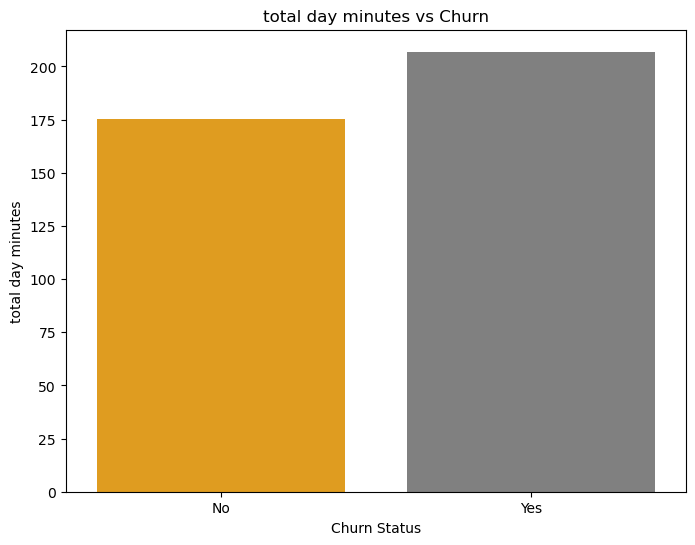

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\3135852207.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='total eve minutes', data=df, ci=None, palette=['orange', 'grey'])


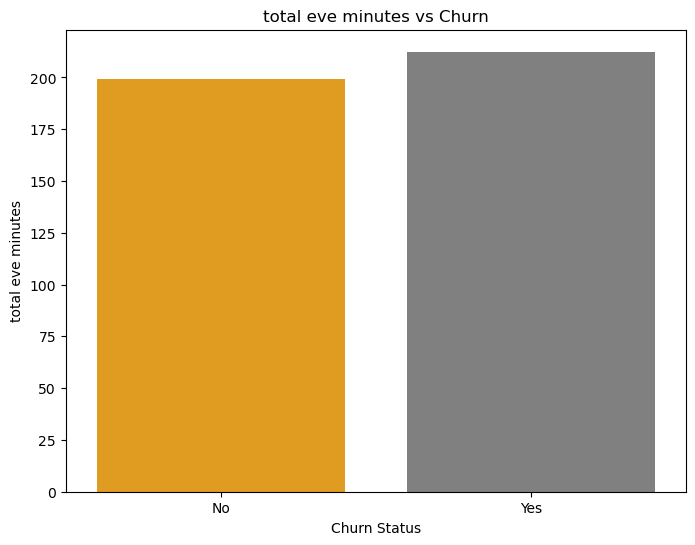

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\3135852207.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='total night minutes', data=df, ci=None, palette=['orange', 'grey'])


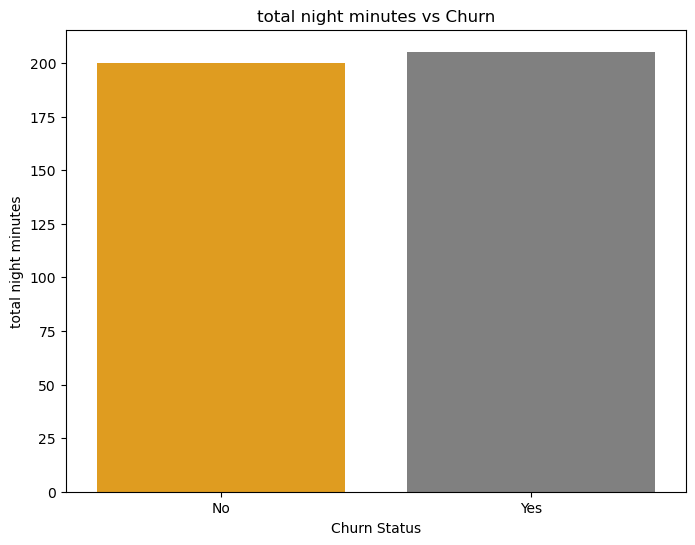

In [16]:
#Total minutes vs Churn

# Map boolean values to 'No' and 'Yes'
df['churn'] = df['churn'].map({False: 'No', True: 'Yes'})

#Display total intl minutes
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total intl minutes', data=df, ci=None, palette=['orange', 'grey'])
plt.title('total intl minutes vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total intl minutes')
plt.show()

#Display total day minutes 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total day minutes', data=df, ci=None, palette=['orange', 'grey'])
plt.title('total day minutes vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total day minutes')
plt.show()

#Display total eve minutes 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total eve minutes', data=df, ci=None, palette=['orange', 'grey'])
plt.title('total eve minutes vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total eve minutes')
plt.show()


#Display total night minutes 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total night minutes', data=df, ci=None, palette=['orange', 'grey'])
plt.title('total night minutes vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total night minutes')
plt.show()

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\4142804432.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='total intl calls', data=df, ci=None, palette=['orange', 'grey'])


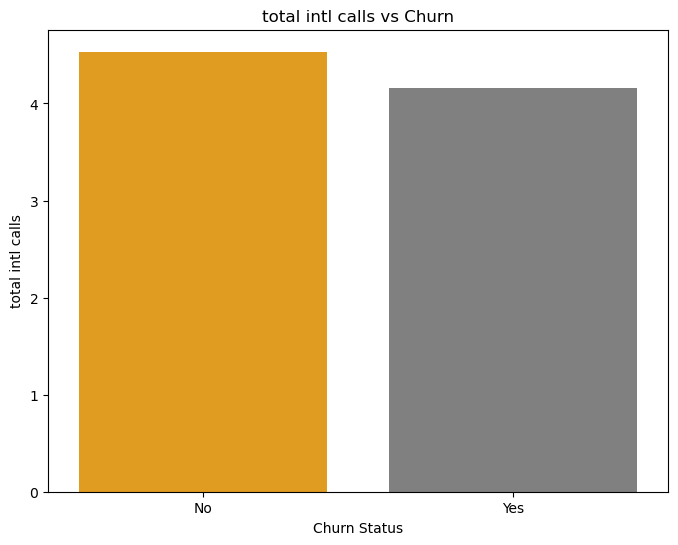

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\4142804432.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='total day calls', data=df, ci=None, palette=['orange', 'grey'])


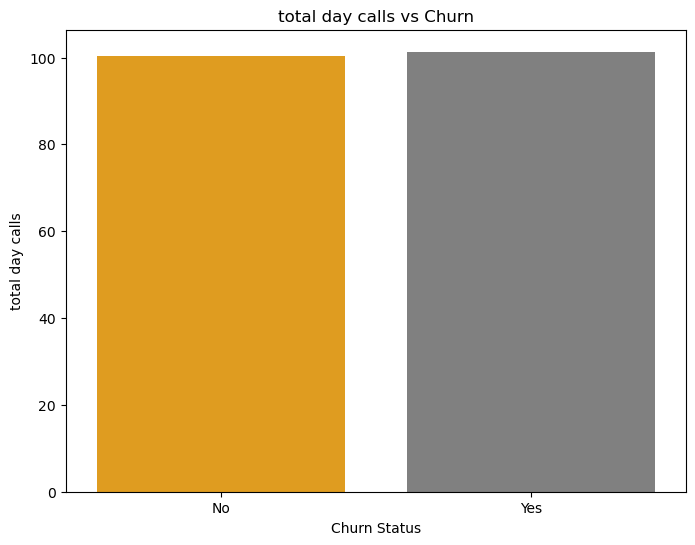

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\4142804432.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='total eve calls', data=df, ci=None, palette=['orange', 'grey'])


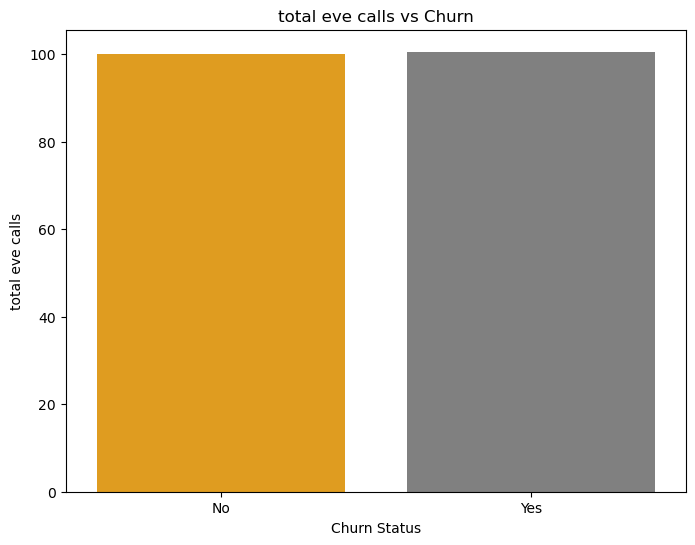

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\4142804432.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='total night calls', data=df, ci=None, palette=['orange', 'grey'])


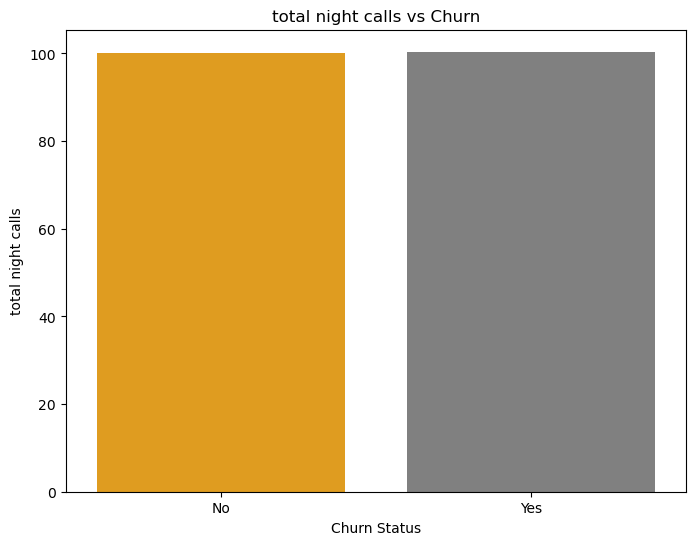

In [17]:
#Total calls vs Churn

#Display total intl calls
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total intl calls', data=df, ci=None, palette=['orange', 'grey'])
plt.title('total intl calls vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total intl calls')
plt.show()

#Display total day calls
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total day calls', data=df, ci=None, palette=['orange', 'grey'])
plt.title('total day calls vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total day calls')
plt.show()

#Display total eve calls 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total eve calls', data=df, ci=None, palette=['orange', 'grey'])
plt.title('total eve calls vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total eve calls')
plt.show()


#Display total night calls 
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='total night calls', data=df, ci=None, palette=['orange', 'grey'])
plt.title('total night calls vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('total night calls')
plt.show()

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\1174151332.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='customer service calls', data=df, ci=None, palette=['orange', 'grey'])


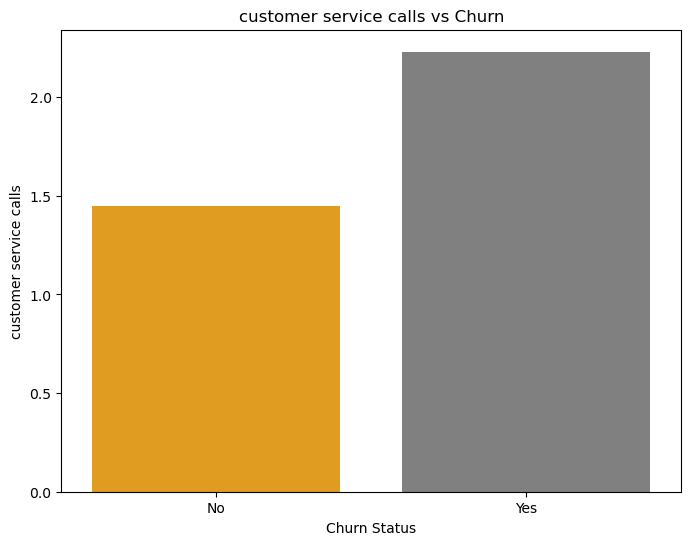

In [18]:
#Customer service calls vs churn status

#Display customer service calls
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='customer service calls', data=df, ci=None, palette=['orange', 'grey'])
plt.title('customer service calls vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('customer service calls')
plt.show()

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\2790817683.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y='number vmail messages', data=df, ci=None, palette=['orange', 'grey'])


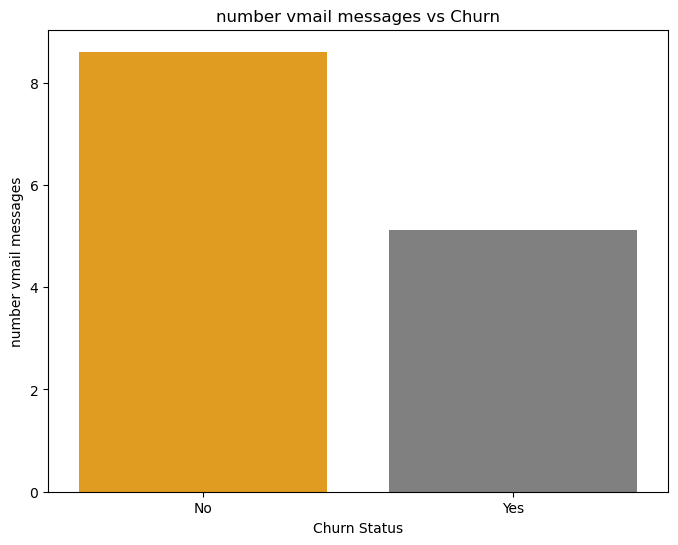

In [19]:
#number vmail messages vs churn status

#Display customer service calls
plt.figure(figsize=(8, 6))
sns.barplot(x='churn', y='number vmail messages', data=df, ci=None, palette=['orange', 'grey'])
plt.title('number vmail messages vs Churn')
plt.xlabel('Churn Status')
plt.ylabel('number vmail messages')
plt.show()

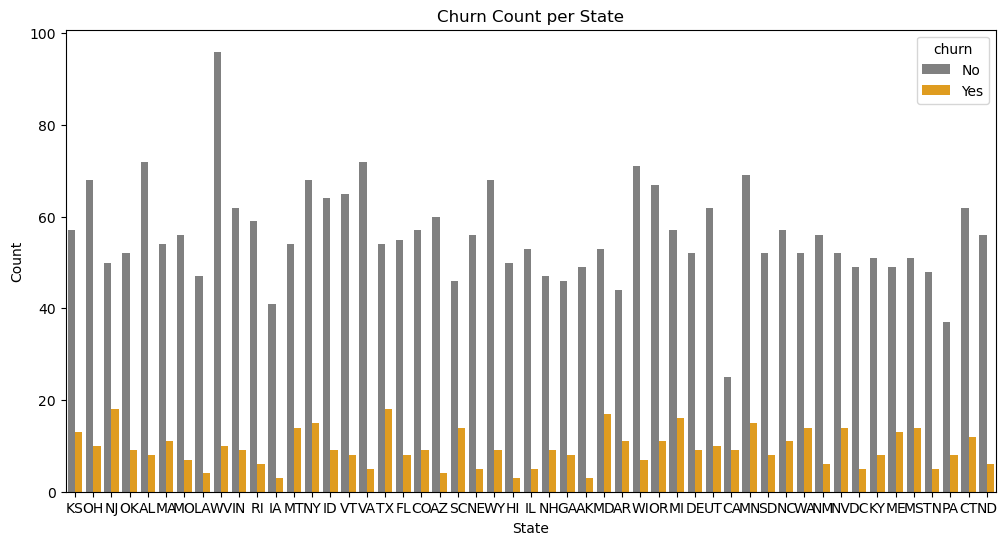

In [20]:
#State vs Churn

# Create a bar plot for churn count per state
plt.figure(figsize=(12, 6))
sns.countplot(x='state', hue='churn', data=df, palette={'Yes': 'Orange', 'No': 'grey'})
plt.title('Churn Count per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

### Data Preprocessing

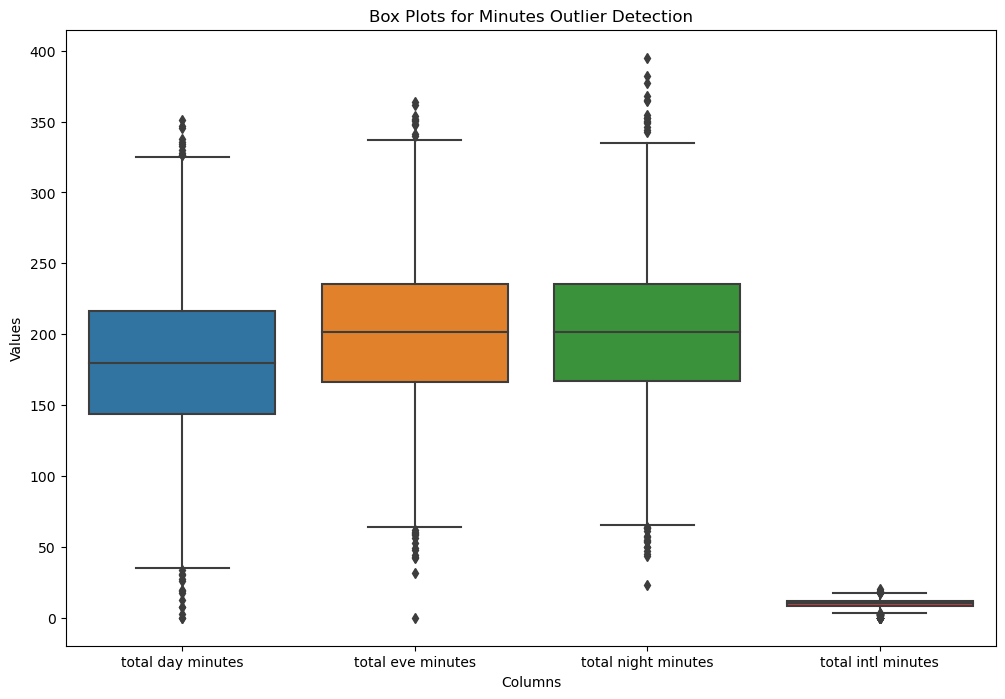

In [21]:
# Check for outliers
# Create box plots to check for outliers in total minutes
plt.figure(figsize=(12, 8))
df_minutes = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']]
sns.boxplot(data=df_minutes)
plt.title('Box Plots for Minutes Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [22]:
# Identifying outliers using IQR
def IQR_outliers(data, column):
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    return outliers, Q1, Q3, IQR

In [23]:
total_day_minutes_outliers = IQR_outliers(df, 'total day minutes')
total_day_minutes_outliers[0]

[332.9,
 337.4,
 326.5,
 350.8,
 335.5,
 30.9,
 34.0,
 334.3,
 346.8,
 12.5,
 25.9,
 0.0,
 0.0,
 19.5,
 329.8,
 7.9,
 328.1,
 27.0,
 17.6,
 326.3,
 345.3,
 2.6,
 7.8,
 18.9,
 29.9]

In [24]:
#Removing and dealing with outliers using IQR
def IQR_remove_outliers(data, column):
    # get values from previous function
    identify = IQR_outliers(data, column)
    Q1 = identify[1]
    Q3 = identify[2]
    IQR = identify[3]
    # remove the outliers
    df = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]

    return df

In [25]:
# Removing outliers simultaneously
for i in df_minutes:
  df = IQR_remove_outliers(df, i)

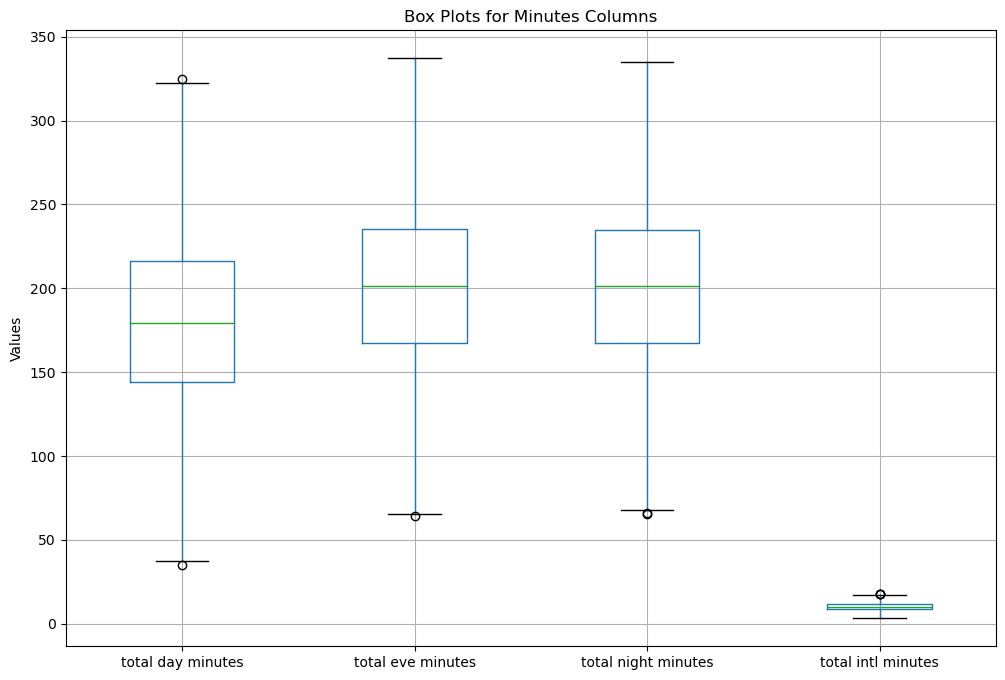

In [26]:
# Box plot to show cleaned data
columns_to_plot = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

# Create box plots
df[columns_to_plot].boxplot(figsize=(12, 8))
plt.title('Box Plots for Minutes Columns')
plt.ylabel('Values')
plt.show()

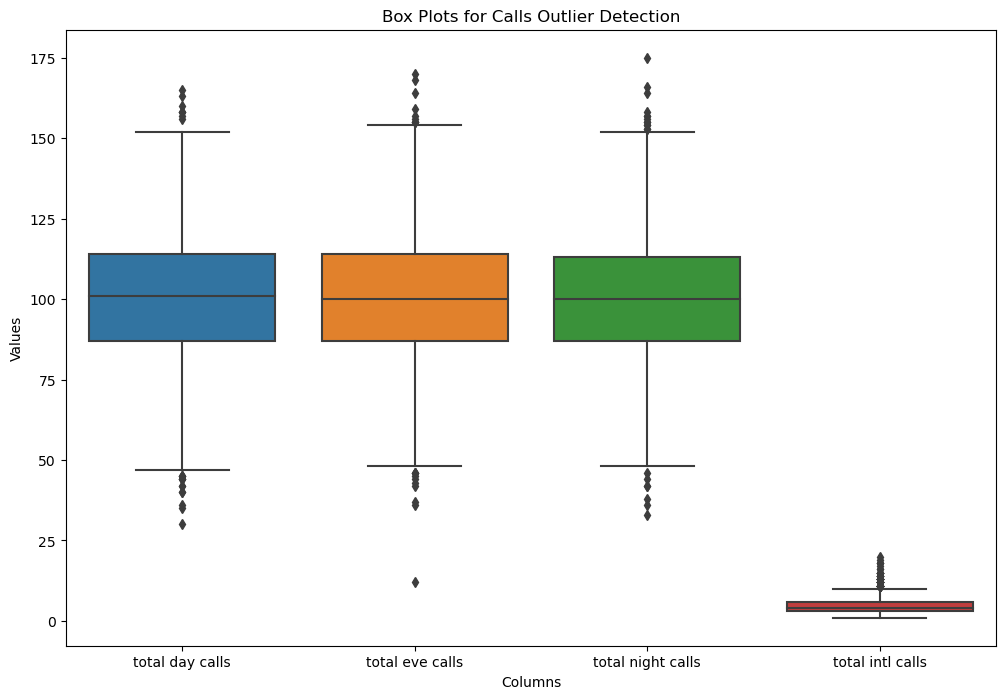

In [27]:
# Create box plots to check for outliers in total calls
plt.figure(figsize=(12, 8))
df_calls = df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']]
sns.boxplot(data=df_calls)
plt.title('Box Plots for Calls Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [28]:
# Removing outliers simultaneously
for i in df_calls:
  df = IQR_remove_outliers(df, i)

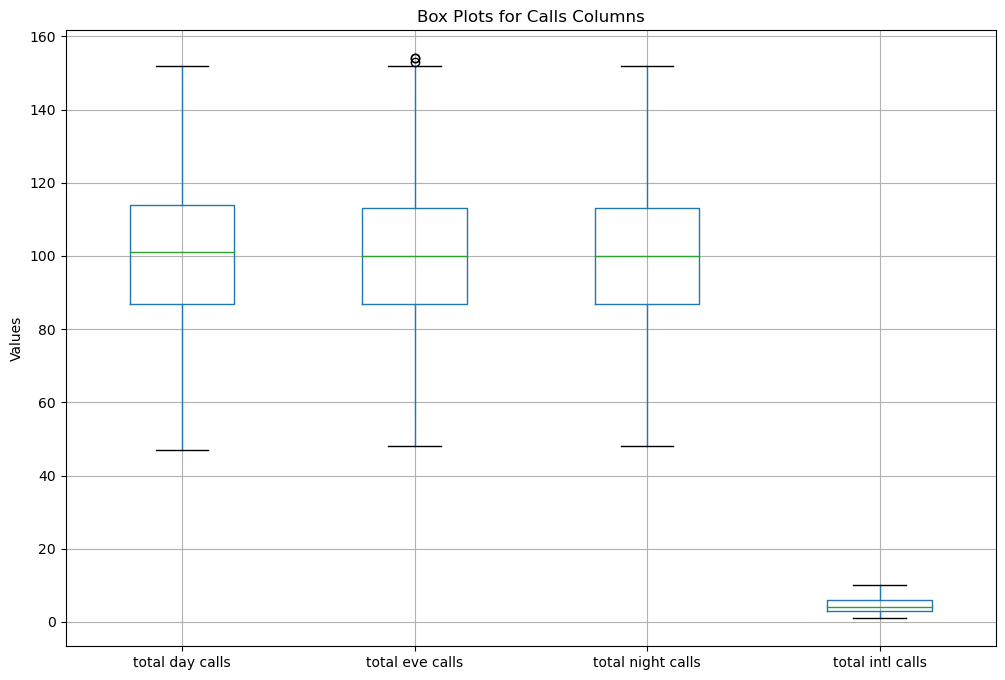

In [29]:
# Box plot to show cleaned data
columns_to_plot = ['total day calls', 'total eve calls', 'total night calls', 'total intl calls']

# Create box plots
df[columns_to_plot].boxplot(figsize=(12, 8))
plt.title('Box Plots for Calls Columns')
plt.ylabel('Values')
plt.show()

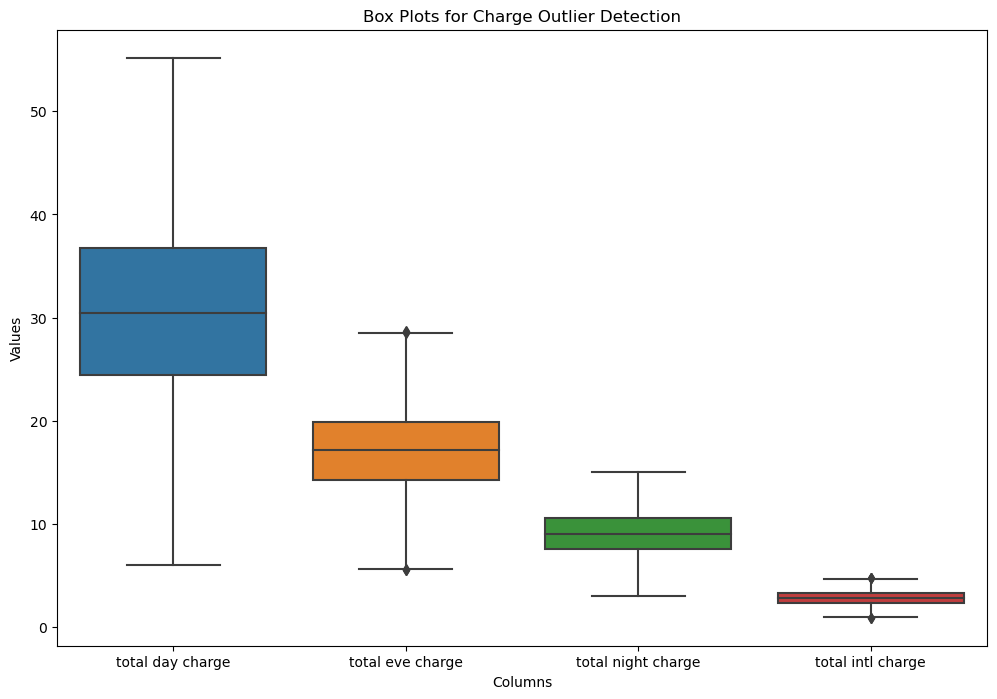

In [30]:
# Create box plots to check for outliers in total charge
plt.figure(figsize=(12, 8))
df_charge = df[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']]
sns.boxplot(data=df_charge)
plt.title('Box Plots for Charge Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [31]:
# Removing outliers simultaneously
for i in df_charge:
  df = IQR_remove_outliers(df, i)

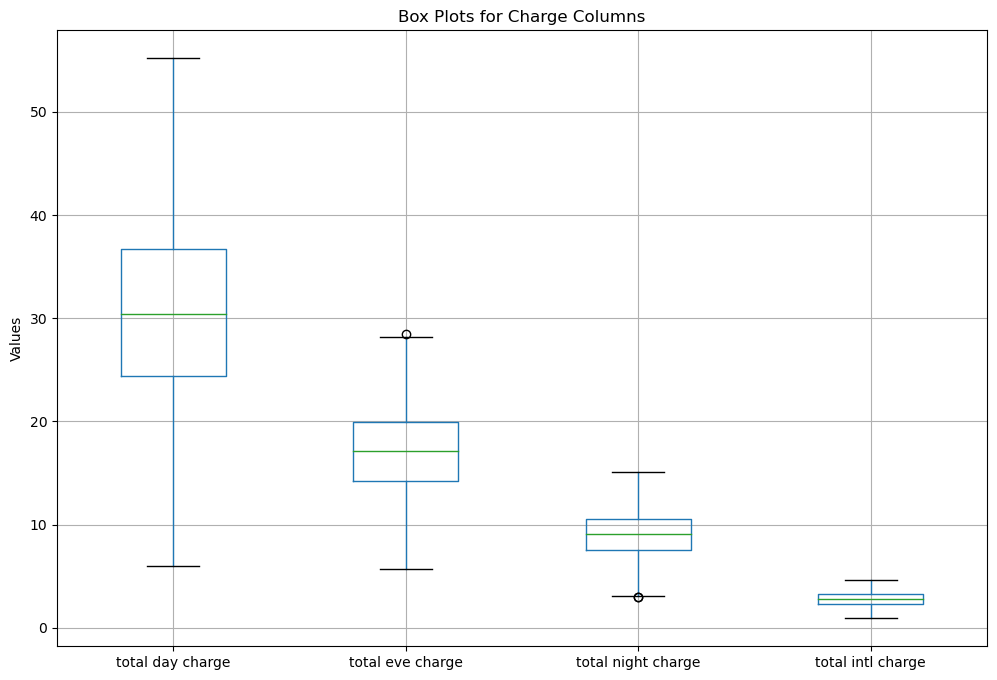

In [32]:
# Box plot to show cleaned data
columns_to_plot = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']

# Create box plots
df[columns_to_plot].boxplot(figsize=(12, 8))
plt.title('Box Plots for Charge Columns')
plt.ylabel('Values')
plt.show()

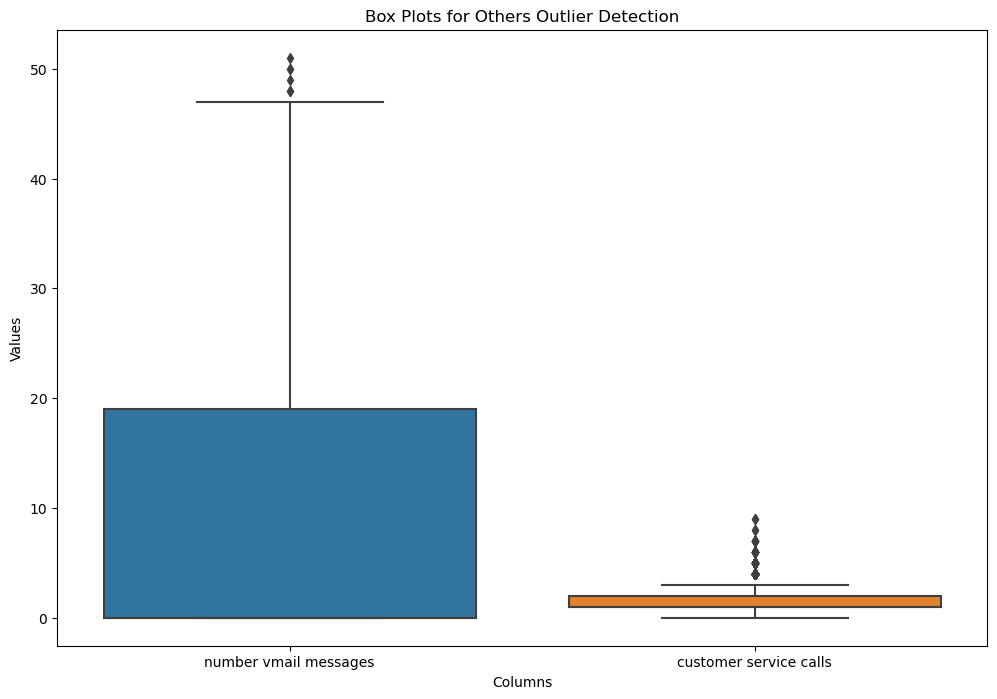

In [33]:
# Check for outliers
# Create box plots to check for outliers in total charge
plt.figure(figsize=(12, 8))
df_other = df[['number vmail messages', 'customer service calls']]
sns.boxplot(data=df_other)
plt.title('Box Plots for Others Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [34]:
# Removing outliers simultaneously
for i in df_other :
  df = IQR_remove_outliers(df, i)

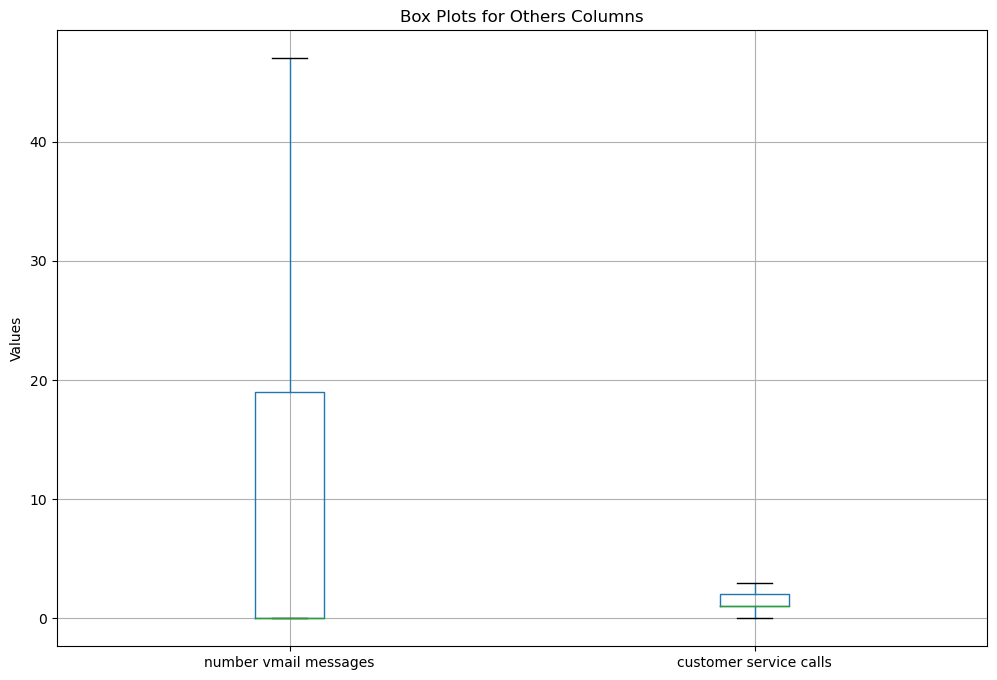

In [35]:
# Box plot to show cleaned data
columns_to_plot = ['number vmail messages', 'customer service calls']

# Create box plots
df[columns_to_plot].boxplot(figsize=(12, 8))
plt.title('Box Plots for Others Columns')
plt.ylabel('Values')
plt.show()

### Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

#columns to label encode
cols = df.columns[df.dtypes == 'object']

#Label encoder object
le = LabelEncoder()

#Label encoding the columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

state [16 35 31 36  1 24 49 39 12 26 13 46 45 43  9 40 29 50 11 14 30  3 10  0
 19  2 48 37 22  8 15 44  5  4 23 41 27 47 32 33  7 20 17 18 21 25 42 38
  6 34 28] 

international plan [0 1] 

voice mail plan [1 0] 

churn [0 1] 



In [37]:
df.dtypes

state                       int32
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

### Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

#Standardizing the data

sc = StandardScaler()
scaled_cols = df[['number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 
                 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 
                 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']]
scaled_cols = sc.fit_transform(scaled_cols)

### Correlation Matrix Heatmap

<Axes: >

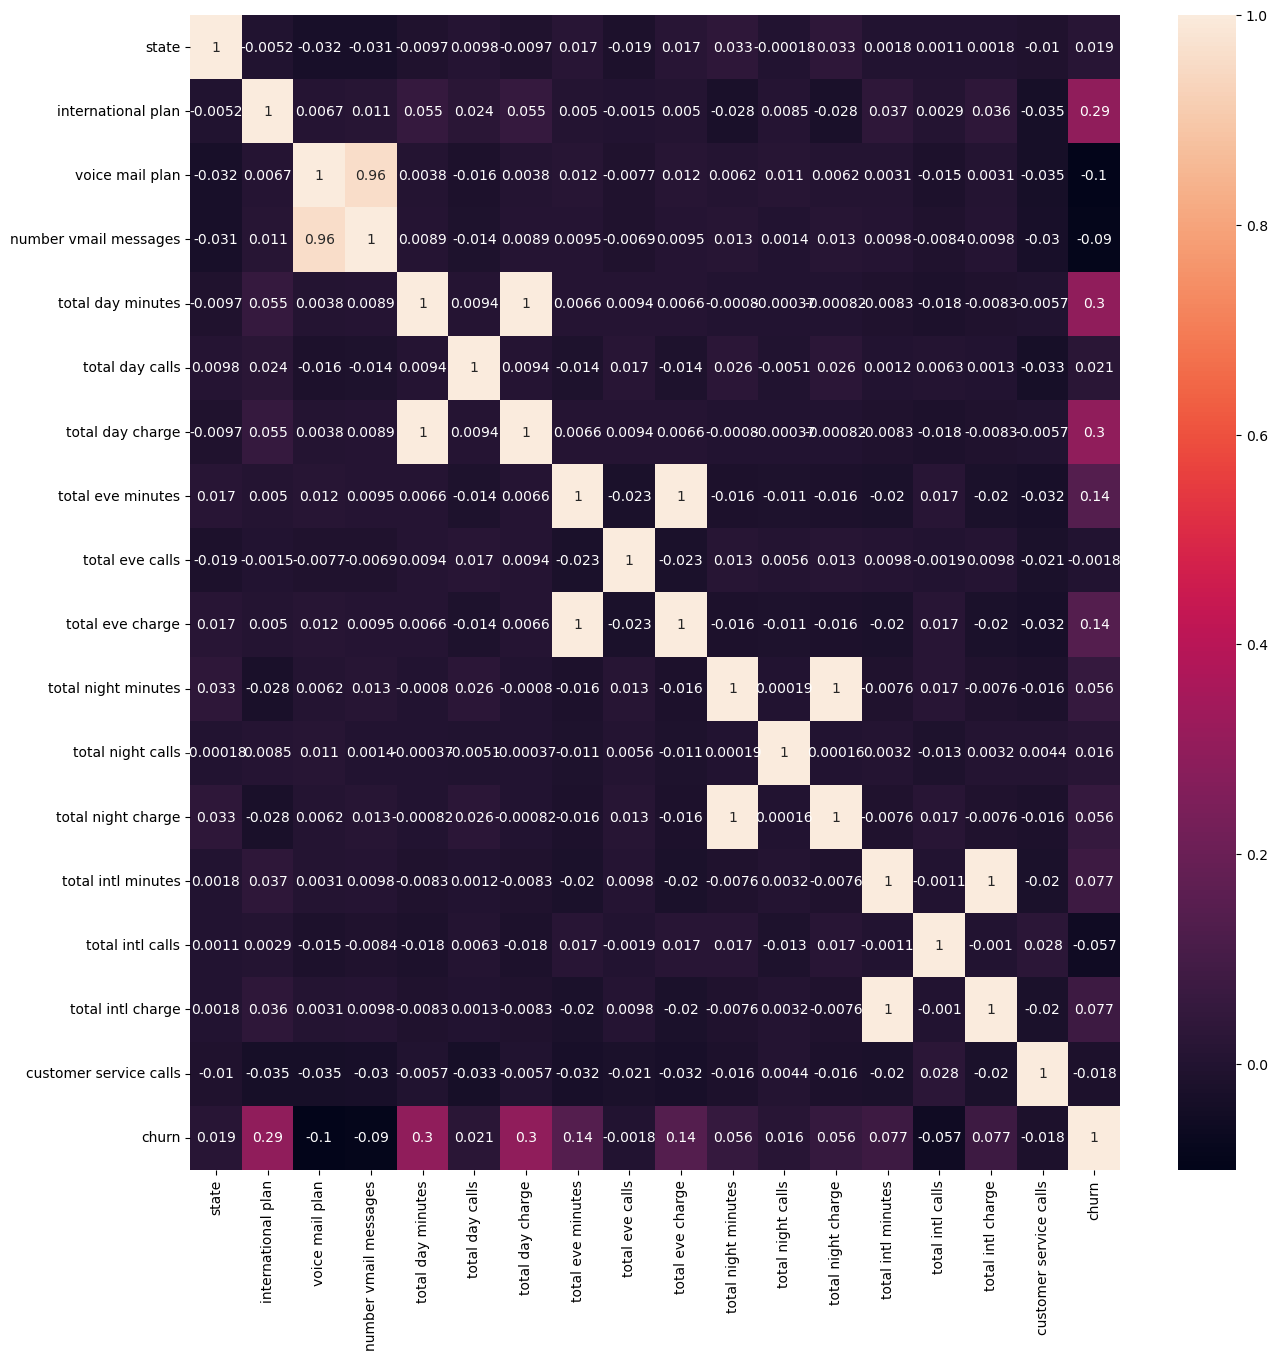

In [39]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [40]:
#check for class imbalance
print(df['churn'].value_counts())

churn
0    2500
1     307
Name: count, dtype: int64


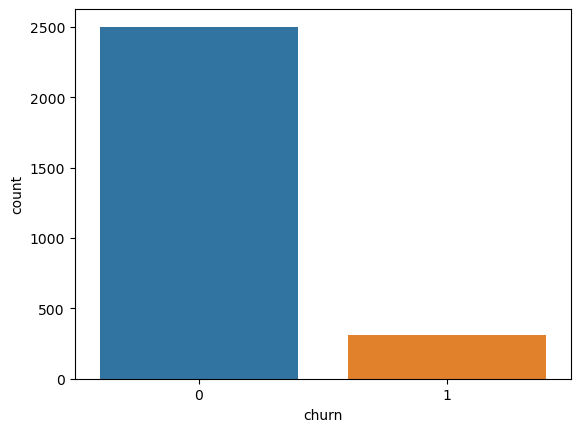

In [41]:
#Visual presentation of the class imbalance
sns.countplot(x='churn', data=df)
plt.show()

In [42]:
class_proportions = df['churn'].value_counts(normalize=True)
print(class_proportions)

churn
0    0.890631
1    0.109369
Name: proportion, dtype: float64


In [43]:
imbalance_ratio = class_proportions[0] / class_proportions[1]
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 8.143322475570033


In [44]:
# assigning X(independent variables) and y(target variable)
X = df.drop('churn', axis=1)
y = df['churn']

In [45]:
#Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelling

Models used to predict customer churn

1.Logistic Regression
2.Decision Trees
3.K Nearest Neighbours

### Logistic Regression

In [46]:
# importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [47]:
# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


# instatiating logistic regression model
logreg = LogisticRegression()

# Perform grid search with cross-validation
log_model = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
log_model.fit(X_train, y_train)

# Get the best parameters
best_params = log_model.best_params_

# Use the best model to make predictions on the test set
l_pred = log_model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, l_pred)*100,2), "%")

#l_pred = log_model.predict(X_test)


#accuracy = accuracy_score(y_test, l_pred)

#print(f'Best Parameters: {best_params}')
#print(f'Accuracy: {accuracy}')


C:\Users\Sellah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sellah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sellah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sellah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Accuracy Score: 88.97 %


C:\Users\Sellah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sellah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

### Decision Trees

In [48]:
#Decision trees
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
clf  = DecisionTreeClassifier()

### Hyperparameter tuning using GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 0}


In [50]:
from sklearn.metrics import accuracy_score
from sklearn import tree

#Decision Tree Classifier Object with best parameters
clf  = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=8, min_samples_split=2, random_state=0)

#Fitting the data
clf.fit(X_train, y_train)

#Predicting the values
d_pred = clf.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, d_pred)*100,2), "%")


#Training accuracy
#print('Training Accuracy: ', clf.score(X_train, y_train))

#Predicting the values
#d_pred = clf.predict(X_test)

#print('Accuracy:', accuracy_score(y_test, d_pred))

Accuracy Score: 95.2 %


### K Nearest Neighbours

In [51]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

### Hyperparameter tuning using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'n_neighbors': [2,4,6,8,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

#Grid Search Object with KNN Classifier
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

#Fitting the data
grid_search.fit(X_train, y_train)

#Best parameters
print(grid_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}


C:\Users\Sellah\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.86770358        nan 0.91536844        nan 0.91670415
        nan 0.91715038        nan 0.9189335  0.91447599 0.86770358
 0.91759601 0.91536844 0.91314147 0.91670415 0.9122502  0.91715038
 0.9135871  0.9189335  0.91447599 0.86770358 0.91759601 0.91536844
 0.91314147 0.91670415 0.9122502  0.91715038 0.9135871  0.9189335
        nan 0.86770358        nan 0.91536844        nan 0.91670415
        nan 0.91715038        nan 0.9189335 ]
  warnings.warn(


In [53]:
#KNN Classifier Object with best parameters
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=10, weights='distance')

#Fitting the data
knn.fit(X_train, y_train)

#Training accuracy
#print('Training Accuracy: ', knn.score(X_train, y_train))

#Predicting the values
#k_pred = knn.predict(X_test)

k_pred = knn.predict(X_test)
print("Accuracy Score:", round(accuracy_score(y_test, k_pred)*100,2), "%")

#print('Accuracy:', accuracy_score(y_test, k_pred))

Accuracy Score: 92.17 %


### Model Evaluation

Text(0.5, 1.0, 'KNN Confusion Matrix')

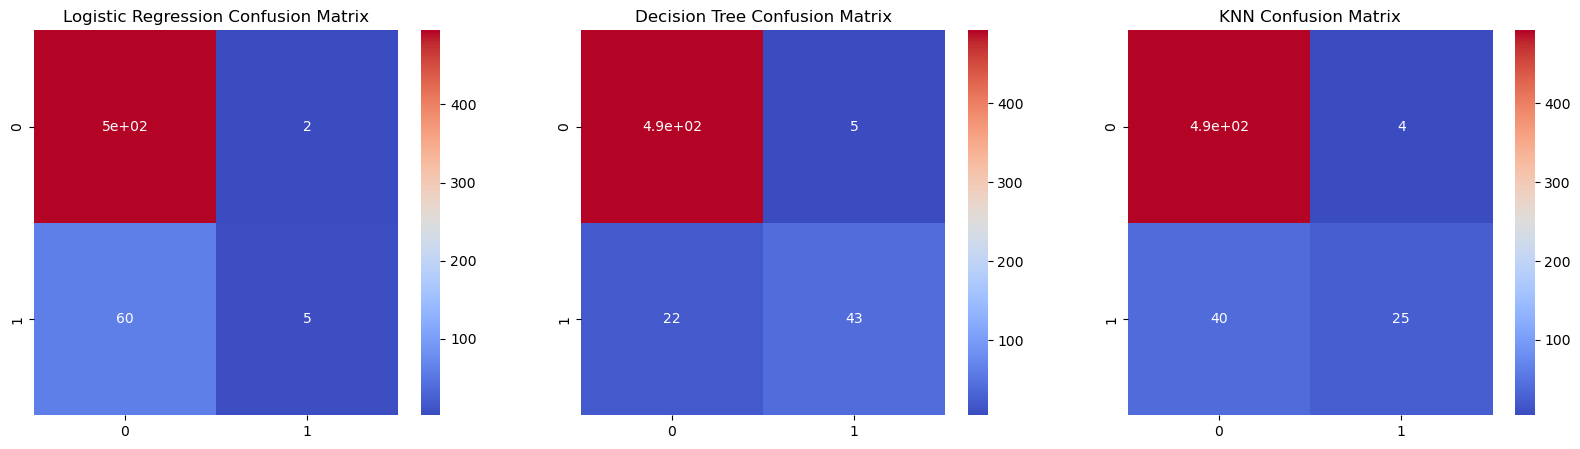

In [54]:
#Confusion Matrix HeatMap

from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 3, figsize=(20, 5))

#Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, ax=ax[0], cmap='coolwarm').set_title('Logistic Regression Confusion Matrix')

#Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, ax=ax[1], cmap='coolwarm').set_title('Decision Tree Confusion Matrix')

#KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, k_pred), annot=True, ax=ax[2], cmap='coolwarm').set_title('KNN Confusion Matrix')

### Distribution Plot¶

C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\2143347518.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0]).set_title('Logistic Regression')
C:\Users\Sellah\AppData\Local\Temp\ipykernel_9044\2143347518.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de441

<Axes: title={'center': 'KNN'}, xlabel='churn', ylabel='Density'>

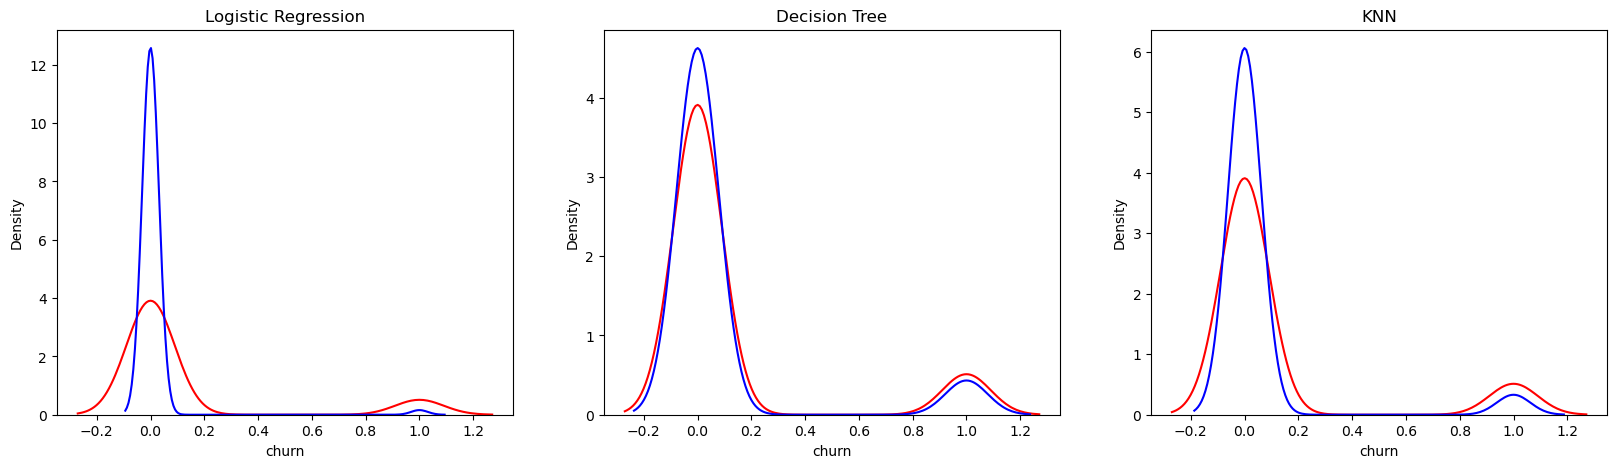

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))


#Logistic Regression
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0]).set_title('Logistic Regression')
sns.distplot(l_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0])

#Decision Tree 
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1]).set_title('Decision Tree')
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1])

#KNN
sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[2]).set_title('KNN')
sns.distplot(k_pred, hist=False, color="b", label="Fitted Values" , ax=ax[2])

### Classification Report

In [56]:
from sklearn.metrics import classification_report

print('Logistic Regression Classification Report: \n', classification_report(y_test, l_pred))

print('Decision Tree Classification Report: \n', classification_report(y_test, d_pred))

print('KNN Classification Report: \n', classification_report(y_test, k_pred))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       497
           1       0.71      0.08      0.14        65

    accuracy                           0.89       562
   macro avg       0.80      0.54      0.54       562
weighted avg       0.87      0.89      0.85       562

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       497
           1       0.90      0.66      0.76        65

    accuracy                           0.95       562
   macro avg       0.93      0.83      0.87       562
weighted avg       0.95      0.95      0.95       562

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       497
           1       0.86      0.38      0.53        65

    accuracy                           0.92       562
   macro avg   

### Model Metrics

Text(0.5, 1.0, 'F1 Score')

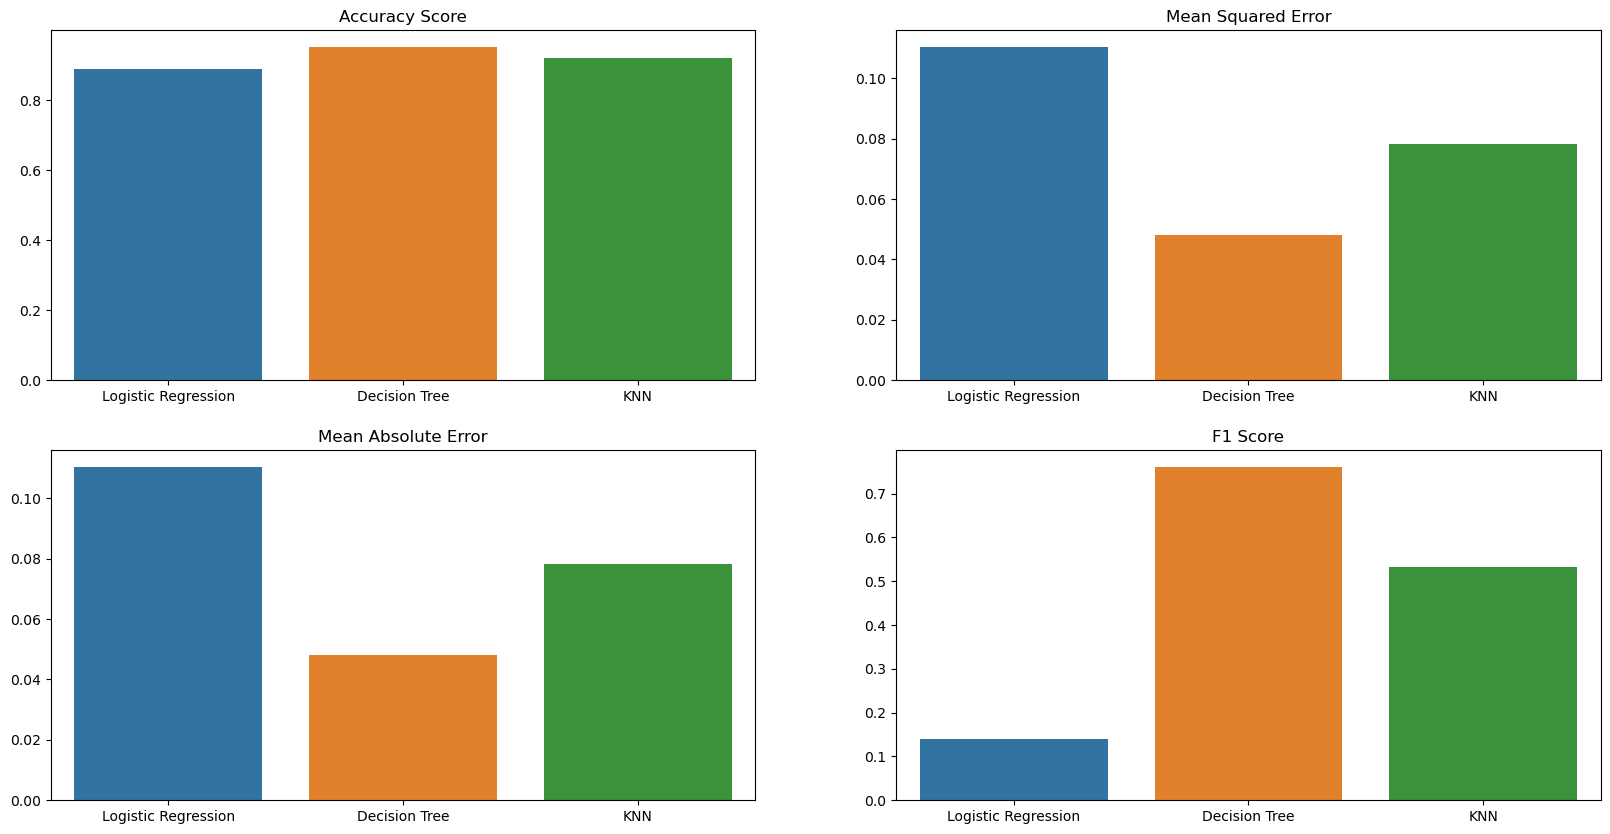

In [57]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score

#Bar plots
fig, ax = plt.subplots(2,2, figsize=(20, 10))

#Accuracy Score
sns.barplot(x = ['Logistic Regression', 'Decision Tree', 'KNN'], y = [accuracy_score(y_test, l_pred), accuracy_score(y_test, d_pred), accuracy_score(y_test, k_pred)], ax=ax[0,0]).set_title('Accuracy Score')

#Mean Squared Error
sns.barplot(x = ['Logistic Regression','Decision Tree','KNN'], y = [mean_squared_error(y_test, l_pred), mean_squared_error(y_test, d_pred), mean_squared_error(y_test, k_pred)], ax=ax[0,1]).set_title('Mean Squared Error')

#Mean Absolute Error
sns.barplot(x = ['Logistic Regression','Decision Tree','KNN'], y = [mean_absolute_error(y_test, l_pred), mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, k_pred)], ax=ax[1,0]).set_title('Mean Absolute Error')

#F1 Score
sns.barplot(x = ['Logistic Regression','Decision Tree', 'KNN'], y = [f1_score(y_test, l_pred), f1_score(y_test, d_pred), f1_score(y_test, k_pred)], ax=ax[1,1]).set_title('F1 Score')

The Decision Tree Classifier has the highest accuracy score and F1 Score, and lowest mean squared error, mean absolute error. Therefore, the Decision Tree Classifier is a good fit for predicting the customer churn.

### Feature Importance

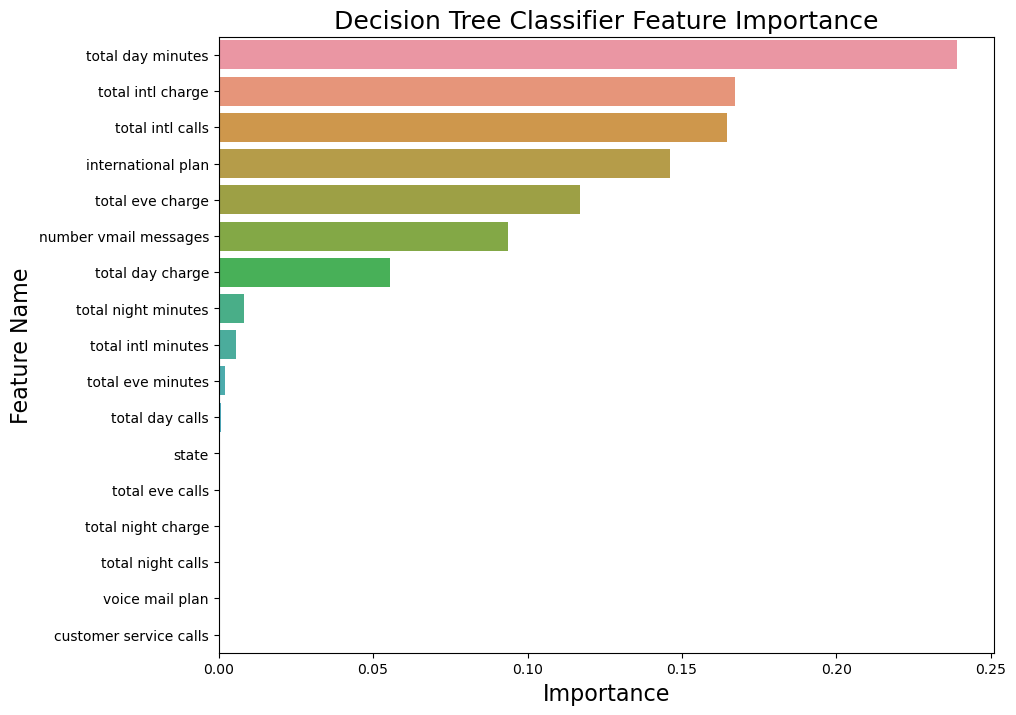

In [58]:
# Decision Tree Classifier Feature Importance
imp_df = pd.DataFrame({ "Feature Name": X_train.columns,
"Importance": clf.feature_importances_})
fi= imp_df.sort_values(by = "Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x= 'Importance', y= 'Feature Name')
plt.title('Decision Tree Classifier Feature Importance', fontsize=18)
plt.xlabel( 'Importance', fontsize=16)
plt.ylabel( 'Feature Name', fontsize=16)
plt.show()


From the Decision Tree Classifier Feature Importance we can see that total day minutes, total int charge, total intl calls are the most important features for predicting customer churn.Therefore, the company should focus on these features to reduce the customer churn.

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [60]:
y_pred_proba = clf.predict_proba(X_test)[:][:,1]
churn_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual'])])
churn_actual_predicted.index=y_test.index

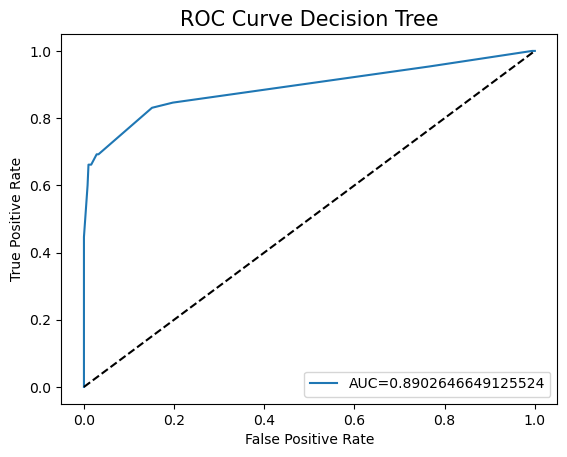

In [61]:
fpr,tpr,_= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='AUC='+str(auc))
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree', size=15)
plt.legend(loc=4)

In [62]:
y2_pred_proba = knn.predict_proba(X_test)[:][:,1]
churn_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual'])])
churn_actual_predicted.index=y_test.index

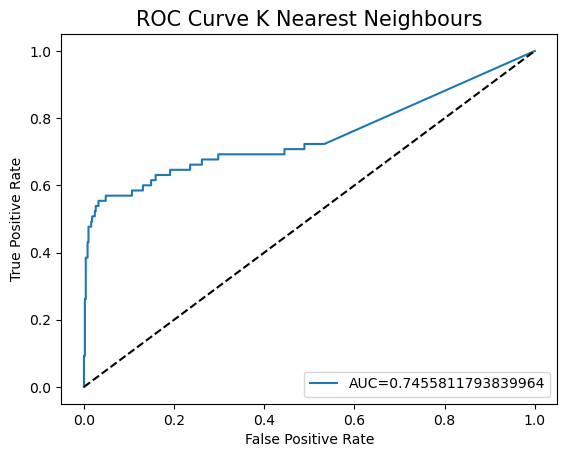

In [63]:
fpr,tpr,_= metrics.roc_curve(y_test, y2_pred_proba)
auc = metrics.roc_auc_score(y_test, y2_pred_proba)
plt.plot(fpr, tpr, label='AUC='+str(auc))
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve K Nearest Neighbours', size=15)
plt.legend(loc=4)

The Decision Tree model is performing relatively well with a higher AUC, indicating strong discriminatory power. The KNN model has a lower AUC but is still acceptable.

### XGBoost

In [64]:
!pip install xgboost

In [65]:
from xgboost import XGBClassifier

# Create XGBClassifier
xgbc = XGBClassifier(
    max_depth=9,
    min_samples_leaf=10,
    min_samples_split=2,
    max_features='sqrt',
    random_state=0
)

# Fit the model
xgbc.fit(X_train, y_train)

C:\Users\Sellah\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:43:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_features='sqrt',
              max_leaves=None, min_child_weight=None, min_samples_leaf=10,
              min_samples_split=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, ...)

In [66]:
y_pred = xgbc.predict(X_test)
print("Accuracy Score:", round(accuracy_score(y_test, y_pred)*100,2), "%")

Accuracy Score: 95.91 %


In [67]:
from sklearn.metrics import f1_score, precision_score, recall_score, jaccard_score, log_loss


print("F-1 Score:", (f1_score(y_test, y_pred, average='micro')))
print("Precision Score:", (precision_score(y_test, y_pred, average='micro')))
print("Recall Score:", (recall_score(y_test, y_pred, average='micro')))
print("Jaccard Score:", (jaccard_score(y_test, y_pred, average='micro')))
print("Log Loss:", (log_loss(y_test, y_pred)))

F-1 Score: 0.9590747330960854
Precision Score: 0.9590747330960854
Recall Score: 0.9590747330960854
Jaccard Score: 0.9213675213675213
Log Loss: 1.4750961351418053


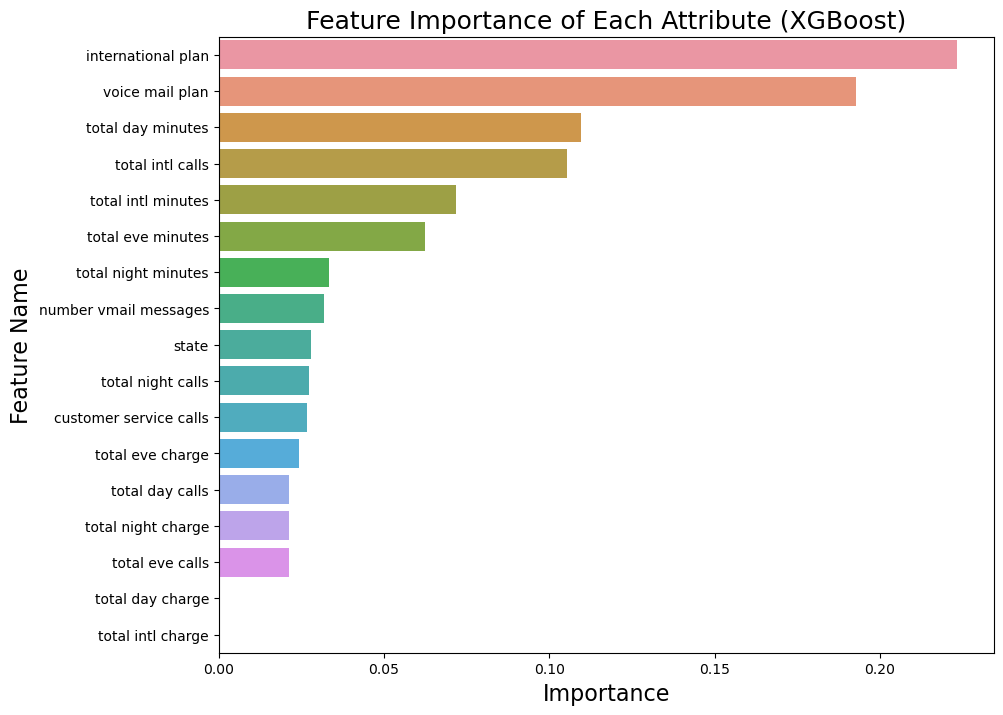

In [68]:
imp_df = pd.DataFrame({ "Feature Name": X_train.columns,
"Importance": xgbc.feature_importances_})
fi= imp_df.sort_values(by = "Importance", ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x= 'Importance', y= 'Feature Name')
plt.title('Feature Importance of Each Attribute (XGBoost)', fontsize=18)
plt.xlabel( 'Importance', fontsize=16)
plt.ylabel( 'Feature Name', fontsize=16)
plt.show()

In [69]:
cm = confusion_matrix (y_test, y_pred)
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

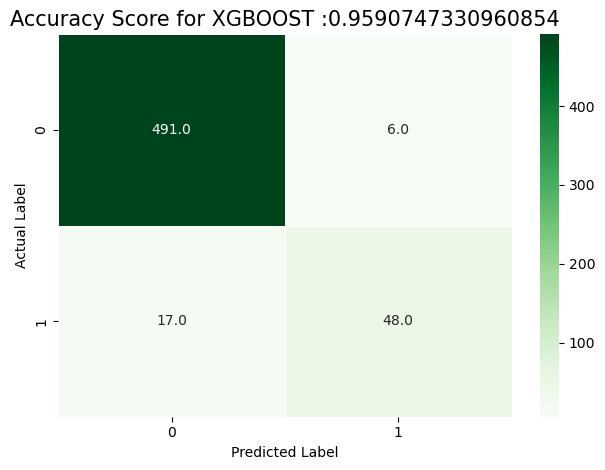

In [70]:
sns.heatmap ( data=cm,linewidths=.5, fmt='.1f', annot=True, cmap='Greens')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for XGBOOST :{0}'.format (xgbc.score(X_test, y_test))
plt.title(all_sample_title, size=15)
plt.tight_layout()

In [71]:
y_pred_proba = xgbc.predict_proba(X_test)[:][:,1]
churn_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual'])])
churn_actual_predicted.index=y_test.index
churn_actual_predicted

y_actual
2830         0
3170         0
1893         1
2968         1
2188         0
...        ...
2580         0
3316         0
786          0
1302         1
1316         0

[562 rows x 1 columns]

In [72]:
fpr,tpr,_= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

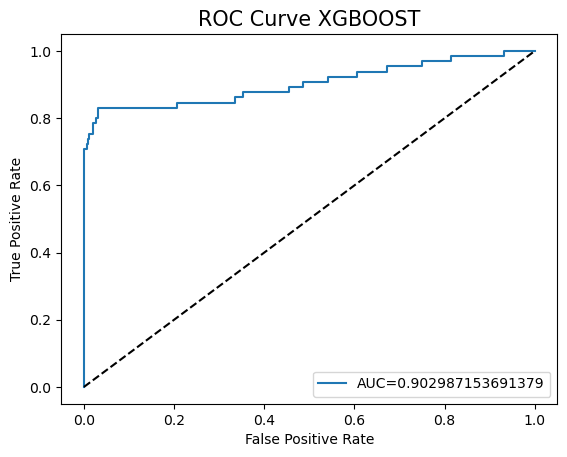

In [73]:
plt.plot(fpr, tpr, label='AUC='+str(auc))
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGBOOST', size=15)
plt.legend(loc=4)

### Conclusion

From our analysis we see that customers with high international calls are less likely to churn as compared to total day calls, total eve calls, and total night calls. The company should then promote more international calls. 

Customers with high number of minutes used during the day are more likely to churn. Morever, customers with a high charge on day time usage are more likely to churn. The company should focus on lowering charges charged during the day. 

Customers who made more customer service calls are more likely to churn. The company should therefore focus on resolving complains made by customers.

Customers with high number of voice mails are less likely to churn. The company should encourage customers to use voice mails. 

The Decision Tree model had the highest accuracy score and F1 Score, and lowest mean squared error, mean absolute error. Therefore, the Decision Tree Classifier is a good fit for predicting the customer churn. 

From the Decision Tree Classifier Feature Importance we can see that total day minutes, total int charge, total intl calls are the most important features for predicting customer churn.Therefore, the company should focus on these features to reduce the customer churn. 

The Decision Tree model is performing relatively well with a higher AUC, indicating strong discriminatory power.

The KNN model has a lower AUC but is still acceptable. After using XGBoost to increase our model performance the AUC increased a little from 0.890 to 0.897 and an accuracy score 97.33% in comparison to Decision Tree with an accuracy score of 95.2%.